In [1]:
#importing relevant libraries 

import pandas as  pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib.colors import ListedColormap



# California WildFires (2013-2020)

This code is an analysis on the dataset California WildFires (2013-2020) (https://www.kaggle.com/datasets/ananthu017/california-wildfire-incidents-20132020).
The file contains the data of over 1600 wildfires that have occurred in California between 2013 and 2020. It is important to notice that these are not all fires that happened
during this period.

Our goal is to identify the worst fires in California between 2013-2020.

In [2]:
plt.style.use('ggplot') #matplot style

In [338]:
file = 'C:\\Users\\Dell\\Documents\\Estudo Data Science\\Codes, Notebooks\\Cali Fire\\California_Fire_Incidents.csv'
ds = pd.read_csv(file) #Opening csv file

In [339]:
#Some part of our data is irrelevant for the current analysis

data = ds.drop(['Active', 'AdminUnit', 'AirTankers','CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'CountyIds', 'CrewsInvolved', 'Dozers','Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders','Location',
       'Engines'], axis = 1).dropna()

In [340]:
# Some data points do not belong to California 

filtered = data[ (data['Latitude'] < 44) & (data['Latitude'] > 30) & (data['Longitude'] < 0) & (data['Status'] == 'Finalized')]
filtered = filtered.drop_duplicates(subset=['AcresBurned', 'Latitude', 'Longitude', 'ArchiveYear']).drop(index=[113])

# Map Analysis
We start by mapping the the fires by their locations, acres burned, and year. We also highlight some of the main counties of interest.

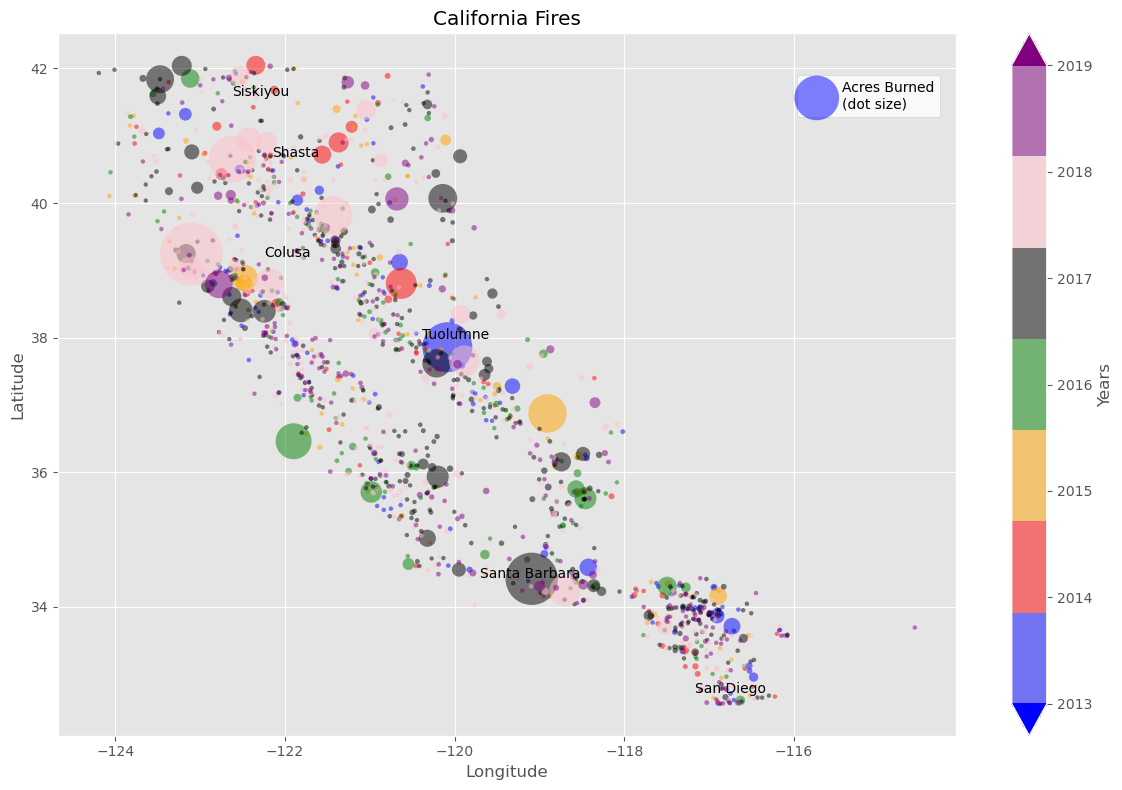

In [497]:
y = filtered['Latitude']
x = filtered['Longitude']
c = filtered['ArchiveYear']

cmap = ListedColormap(["blue","red","orange","green",'black','pink','purple'])

plt.figure(figsize=(12,8))
plt.scatter(y= y, x = x, c = c, cmap=cmap, s=filtered['AcresBurned']*0.005 + 10, alpha = 0.5, edgecolors='none', label = 'Acres Burned\n(dot size)')
plt.colorbar(extend='both', label = 'Years')
plt.text(x =-122.24774475, y= 39.19734631 , s = 'Colusa', alpha = 1, color = 'black')
plt.text(x =-122.14775721, y= 40.69108260 , s = 'Shasta', alpha = 1, color = 'black',)
plt.text(x =-119.698189, y= 34.420830 , s = 'Santa Barbara', alpha = 1, color = 'black')
plt.text(x =-120.38212, y= 37.982944 , s = 'Tuolumne', alpha = 1, color = 'black')
plt.text(x =-122.62423724, y= 41.59647995 , s = 'Siskiyou', alpha = 1, color = 'black')
plt.text(x =-117.161097, y= 32.715731 , s = 'San Diego', alpha = 1, color = 'black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Fires')
plt.legend(bbox_to_anchor = (0.99, 0.95), shadow=False).get_frame().set_facecolor('white')
plt.tight_layout()



The amount of fires per year is given by:

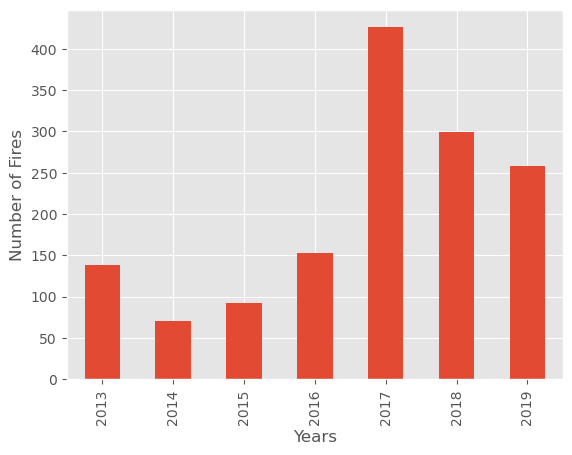

In [442]:
filtered.groupby('ArchiveYear').count()['AcresBurned'].plot.bar(ylabel = 'Number of Fires', xlabel = 'Years');

# Top 5 counties with most acres burned between 2013-2019

Next we select the top 5 counties with most acres burned:

C:\Users\Dell\AppData\Local\Temp\ipykernel_15684\3208095804.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered.groupby(['Counties']).sum().sort_values('AcresBurned')[-5:]['AcresBurned'].plot.bar(ylabel = 'Acres Burned', title = 'Fire Impact');


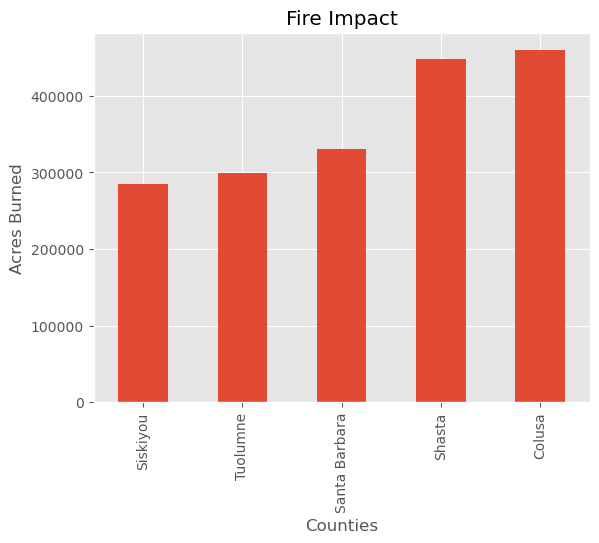

In [380]:
filtered.groupby(['Counties']).sum().sort_values('AcresBurned')[-5:]['AcresBurned'].plot.bar(ylabel = 'Acres Burned', title = 'Fire Impact');

If we look at it by years, we have a better understanding of the outliners:

C:\Users\Dell\AppData\Local\Temp\ipykernel_15684\3164625262.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered[filtered['Counties'].isin(['Shasta','Colusa','Santa Barbara','Tuolumne','Siskiyou'])].groupby('Counties_Year').sum()['AcresBurned'].plot.bar(figsize = (15,5));


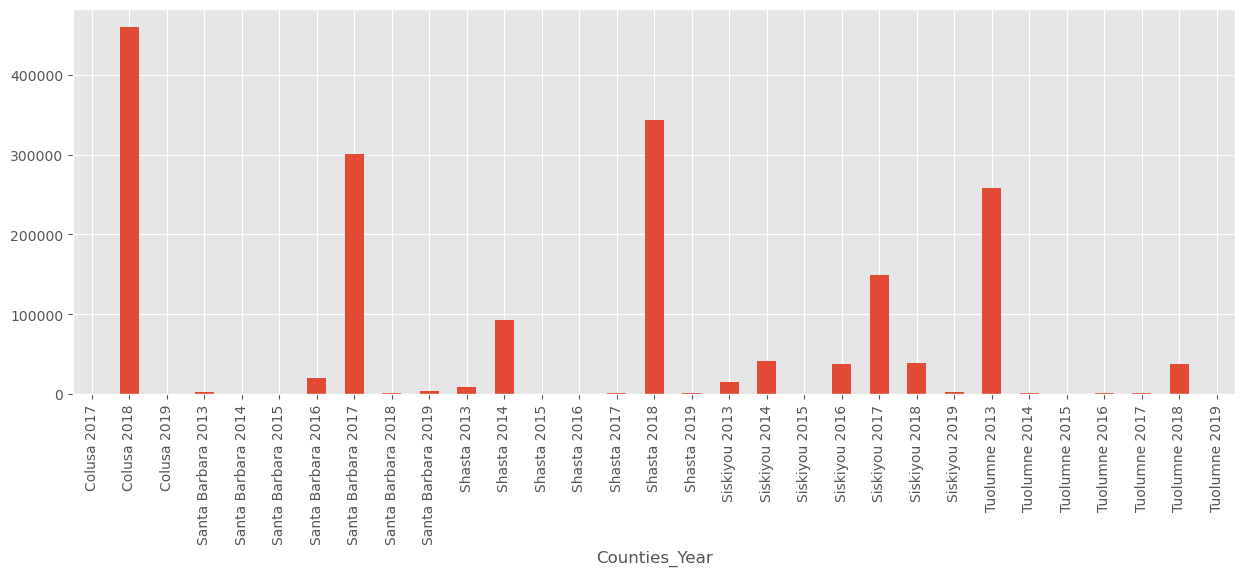

In [381]:
filtered['Counties_Year'] = filtered['Counties'] + ' ' + filtered['ArchiveYear'].astype(str) 
filtered[filtered['Counties'].isin(['Shasta','Colusa','Santa Barbara','Tuolumne','Siskiyou'])].groupby('Counties_Year').sum()['AcresBurned'].plot.bar(figsize = (15,5));

We see that Colusa had it's biggest fire in 2018, and that is explained by the following headline "The Mendocino Complex Fire was a large complex of wildfires that burned in northern California for more than three months in 2018".

Santa Barbara also had an abnormal fire in 2017 which is explained by the headline "The Thomas Fire was a massive wildfire that affected Ventura and Santa Barbara Counties"

Shasta had a big fire in 2018 that is explained by the headline "The Carr Fire was a large wildfire that burned in Shasta and Trinity Counties in California, United States.
The fire burned 229,651 acres (92,936 ha; 359 sq mi), before it was 100% contained late on August 30, 2018."

Siskiyou, and Tuolumne and had some minor, but abnormal fires in 2017, and 2018, respectively, that can be explained by the headline "The Rim Fire was a massive wildfire that started in a remote canyon in Stanislaus National Forest, in California. This portion of the central Sierra Nevada spans Tuolumne and Mariposa counties. The fire started on August 17, 2013, during the 2013 California wildfire season", and "The Salmon August Complex Fire was a large complex wildfire in Northern California that originally consisted of 11 separate wildfires, and charred 65,888 acres (266.64 km2) in Siskiyou County. The first fire in the complex was ignited on June 25, 2017 by lightning, and the complex fire burned for nearly 4 months, before it was finally contained on December 8, 2017."

# Fatalities and Injuries

If we analize the fatalities per County, we see that Butte had the most amount of fatalities in 2018:

In [445]:
Fatal = ds[['Fatalities','Counties','ArchiveYear']].dropna().sort_values('Fatalities')
Fatal[-5:]

,Fatalities,Counties,ArchiveYear
624,6.0,Napa,2017
631,9.0,Mendocino,2017
629,22.0,Sonoma,2017
628,22.0,Napa,2017
1060,85.0,Butte,2018


This is explained by the well known Camp Fire, which the deadliest and most destructive wildfire
in California's history, and the most expensive natural 
disaster in the world in 2018 in terms of insured losses.

Now let's see how many injuries related to fires we had between 2013-2019 in each county:

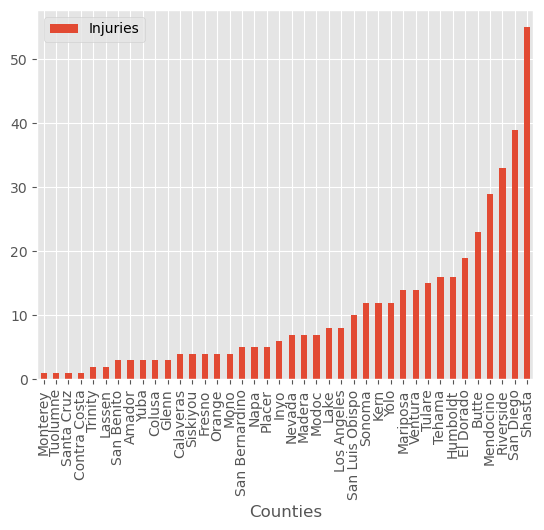

In [498]:
ds[['Injuries','Counties']].dropna().groupby('Counties').sum('Injuries').sort_values('Injuries').plot.bar();

In [452]:
ds['Injuries'].sum()

420.0

In total we had 420 injuries in this period. If we analize by year we see that:

In [495]:
for i in range(7):
    print(ds[['Injuries','ArchiveYear']][ds['ArchiveYear'].isin([i + 2013])].dropna()['Injuries'].sum(), i+2013)
print('')
print('Where ' f'{round((113 + 137)/420,2)*100}' '%' ' comes from 2013, and 2014 only.')


113.0 2013
137.0 2014
52.0 2015
25.0 2016
31.0 2017
28.0 2018
34.0 2019

Where 60.0% comes from 2013, and 2014 only.


In [516]:
ds[['Injuries','Counties', 'ArchiveYear']][ds['ArchiveYear'].isin([2013,2014])][ds['Counties'].isin(['Shasta'])]['Injuries'].sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15684\276139661.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ds[['Injuries','Counties', 'ArchiveYear']][ds['ArchiveYear'].isin([2013,2014])][ds['Counties'].isin(['Shasta'])]['Injuries'].sum()


42.0

We see also that in Shasta, the county with most number of injuries), we have 42 injuries between 2013-2014. This can be explained by the The Carr Fire we mentioned above.